In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df = pd.read_csv('data/training/input.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146532 entries, 0 to 146531
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       146532 non-null  object 
 1   state                      146532 non-null  object 
 2   city_or_county             146532 non-null  object 
 3   address                    136245 non-null  object 
 4   latitude                   146532 non-null  float64
 5   longitude                  146532 non-null  float64
 6   congressional_district     143942 non-null  float64
 7   state_house_district       127740 non-null  float64
 8   state_senate_district      132002 non-null  float64
 9   participant_age1           112187 non-null  float64
 10  participant_age_group1     133183 non-null  object 
 11  participant_gender1        137680 non-null  object 
 12  min_age_participants       112197 non-null  float64
 13  avg_age_participants       1

In [2]:
def get_SVM_dataset(input_dir: str, output_dir: str):
    input = pd.read_csv(input_dir)
    output = pd.read_csv(output_dir)
    df = pd.merge(input, output, left_index=True, right_index=True)

    selected_collumns = ['n_injured', 'n_arrested', 'n_unharmed', 'n_participants']

    df = df[selected_collumns + ['killed']]
    df.dropna(inplace=True)

    input = df[selected_collumns].values
    output = df['killed'].values

    # Normalizza i dati
    scaler = StandardScaler()
    input = scaler.fit_transform(input)
    
    return input, output

input, output = get_SVM_dataset('data/training/input.csv', 'data/training/output.csv')

**Cross validation**

In [3]:
def compute_classification_report(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_pred_bin = (y_pred > 0.5).astype(int)
    report = classification_report(y_val, y_pred_bin, output_dict=True)
    return pd.DataFrame(report).transpose()



Epoch 1/8


3196/3196 [==============================] - 12s 3ms/step - loss: 0.1984 - accuracy: 0.9237 - val_loss: 0.0687 - val_accuracy: 0.9913
Epoch 2/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0529 - accuracy: 0.9915 - val_loss: 0.0443 - val_accuracy: 0.9912
Epoch 3/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0424 - accuracy: 0.9915 - val_loss: 0.0390 - val_accuracy: 0.9915
Epoch 4/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0393 - accuracy: 0.9914 - val_loss: 0.0377 - val_accuracy: 0.9916
Epoch 5/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0385 - accuracy: 0.9915 - val_loss: 0.0374 - val_accuracy: 0.9916
Epoch 6/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0378 - accuracy: 0.9915 - val_loss: 0.0371 - val_accuracy: 0.9916
Epoch 7/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0374 - accuracy: 0.9915 - val_loss: 0.0365 - val_accur

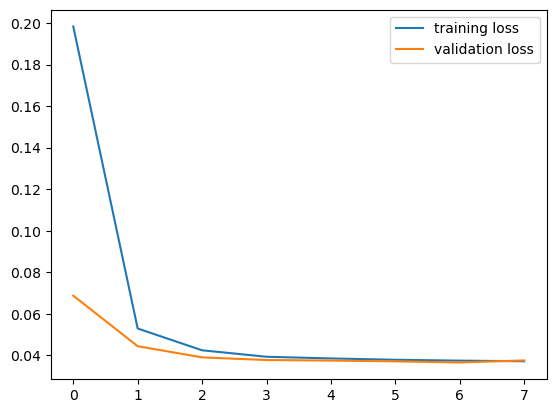

Epoch 1/8
3196/3196 [==============================] - 12s 3ms/step - loss: 0.1110 - accuracy: 0.9596 - val_loss: 0.0393 - val_accuracy: 0.9914
Epoch 2/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0377 - accuracy: 0.9915 - val_loss: 0.0370 - val_accuracy: 0.9914
Epoch 3/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0366 - accuracy: 0.9916 - val_loss: 0.0363 - val_accuracy: 0.9914
Epoch 4/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0360 - accuracy: 0.9916 - val_loss: 0.0358 - val_accuracy: 0.9914
Epoch 5/8
3196/3196 [==============================] - 10s 3ms/step - loss: 0.0356 - accuracy: 0.9916 - val_loss: 0.0356 - val_accuracy: 0.9914
Epoch 6/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0354 - accuracy: 0.9916 - val_loss: 0.0352 - val_accuracy: 0.9914
Epoch 7/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0351 - accuracy: 0.9916 - val_loss: 0.0360 - val_accuracy:

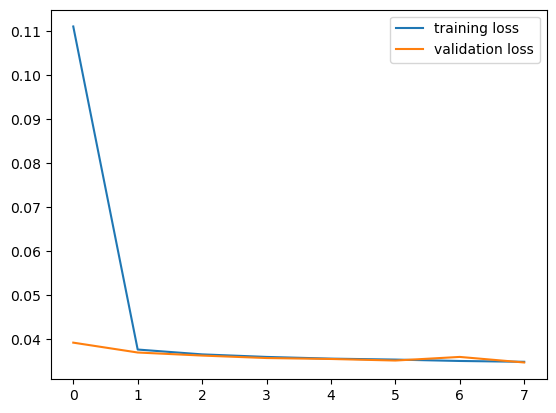

Epoch 1/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.1471 - accuracy: 0.9365 - val_loss: 0.0487 - val_accuracy: 0.9908
Epoch 2/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0420 - accuracy: 0.9898 - val_loss: 0.0403 - val_accuracy: 0.9912
Epoch 3/8
3196/3196 [==============================] - 10s 3ms/step - loss: 0.0383 - accuracy: 0.9910 - val_loss: 0.0394 - val_accuracy: 0.9915
Epoch 4/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0374 - accuracy: 0.9913 - val_loss: 0.0382 - val_accuracy: 0.9916
Epoch 5/8
3196/3196 [==============================] - 10s 3ms/step - loss: 0.0365 - accuracy: 0.9914 - val_loss: 0.0385 - val_accuracy: 0.9915
Epoch 6/8
3196/3196 [==============================] - 10s 3ms/step - loss: 0.0360 - accuracy: 0.9914 - val_loss: 0.0370 - val_accuracy: 0.9916
Epoch 7/8
3196/3196 [==============================] - 10s 3ms/step - loss: 0.0356 - accuracy: 0.9915 - val_loss: 0.0366 - val_accuracy:

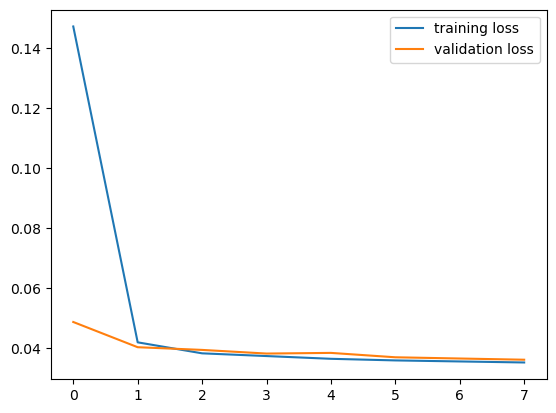

Epoch 1/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.1928 - accuracy: 0.9353 - val_loss: 0.0394 - val_accuracy: 0.9915
Epoch 2/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0366 - accuracy: 0.9915 - val_loss: 0.0371 - val_accuracy: 0.9914
Epoch 3/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0352 - accuracy: 0.9916 - val_loss: 0.0356 - val_accuracy: 0.9915
Epoch 4/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0347 - accuracy: 0.9915 - val_loss: 0.0354 - val_accuracy: 0.9915
Epoch 5/8
3196/3196 [==============================] - 10s 3ms/step - loss: 0.0345 - accuracy: 0.9916 - val_loss: 0.0353 - val_accuracy: 0.9914
Epoch 6/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0343 - accuracy: 0.9916 - val_loss: 0.0351 - val_accuracy: 0.9914
Epoch 7/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0344 - accuracy: 0.9916 - val_loss: 0.0349 - val_accuracy:

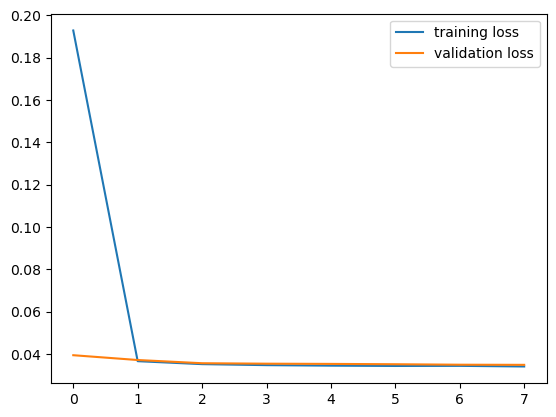

Epoch 1/8
3196/3196 [==============================] - 12s 3ms/step - loss: 0.1418 - accuracy: 0.9494 - val_loss: 0.0398 - val_accuracy: 0.9917
Epoch 2/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0412 - accuracy: 0.9914 - val_loss: 0.0376 - val_accuracy: 0.9914
Epoch 3/8
3196/3196 [==============================] - 10s 3ms/step - loss: 0.0391 - accuracy: 0.9914 - val_loss: 0.0361 - val_accuracy: 0.9917
Epoch 4/8
3196/3196 [==============================] - 10s 3ms/step - loss: 0.0376 - accuracy: 0.9915 - val_loss: 0.0354 - val_accuracy: 0.9917
Epoch 5/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0366 - accuracy: 0.9915 - val_loss: 0.0350 - val_accuracy: 0.9917
Epoch 6/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0360 - accuracy: 0.9915 - val_loss: 0.0354 - val_accuracy: 0.9917
Epoch 7/8
3196/3196 [==============================] - 11s 3ms/step - loss: 0.0355 - accuracy: 0.9915 - val_loss: 0.0351 - val_accuracy:

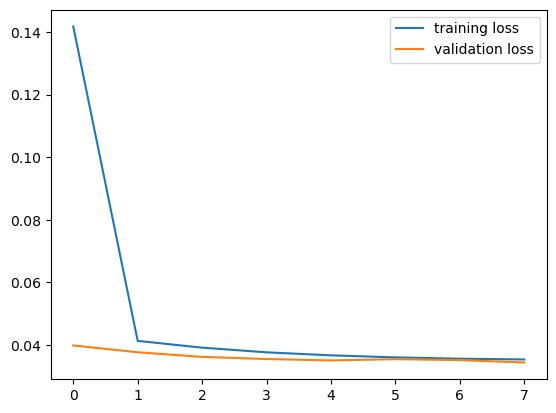

In [4]:
kf = KFold(n_splits=5)  # Definisci il numero di fold qui
fold_no = 1

history_list = []
report_df_list = []
for train, validation in kf.split(input, output):
    model = Sequential()
    model.add(Dense(8, input_dim=input.shape[1], activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(input[train], output[train], epochs=8, batch_size=32, verbose=1,
                        validation_data=(input[validation], output[validation]))
    history_list.append(history)
    
    report_df = compute_classification_report(model, input[validation], output[validation])
    report_df_list.append(report_df)

    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()

    fold_no = fold_no + 1

**Bias-Variance plot training e validation**

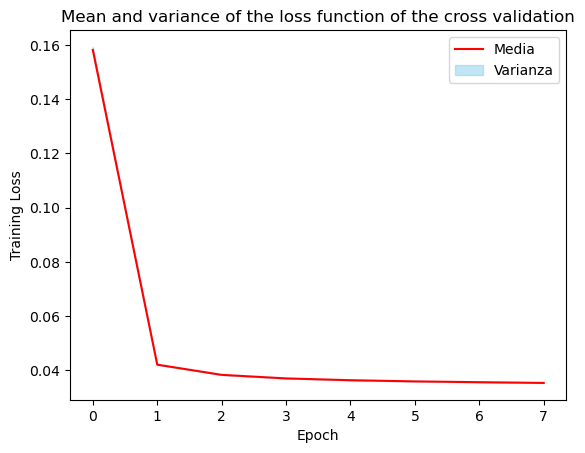

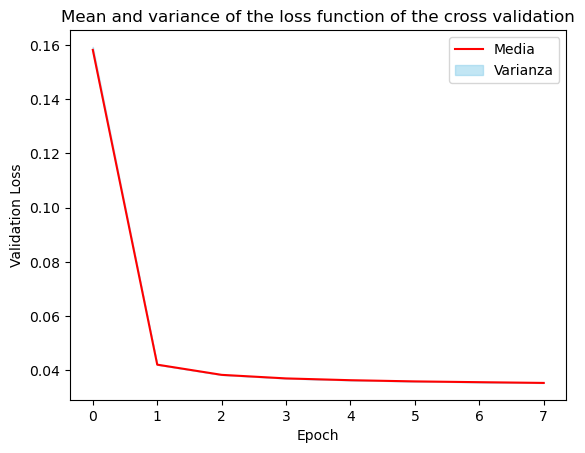

In [5]:
def plot_history(cross_validation_loss, ylabel: str):
    mean = np.mean(cross_validation_loss, axis=0)
    variance = np.var(cross_validation_loss, axis=0)

    # Calcola l'intervallo di confidenza (media +- varianza)
    upper_bound = mean + variance
    lower_bound = mean - variance

    # Crea una nuova figura
    plt.figure()

    # Grafico della media
    plt.plot(mean, label='Media', color='red')
    plt.fill_between(range(len(mean)), lower_bound, upper_bound, color='skyblue', alpha=0.5, label='Varianza')
    plt.title('Mean and variance of the loss function of the cross validation')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    
history_loss = np.array([history.history['loss'] for history in history_list])
plot_history(history_loss, 'Training Loss')

history_loss_variance = np.array([history.history['val_loss'] for history in history_list])
plot_history(history_loss, 'Validation Loss')

**classification_report**

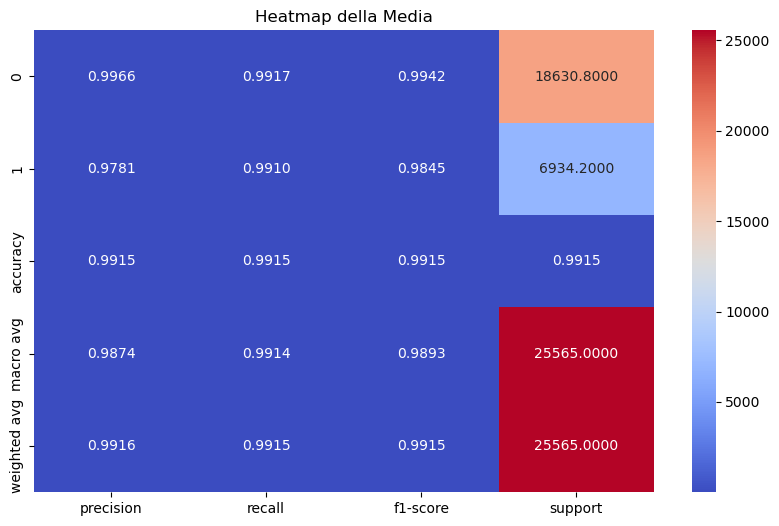

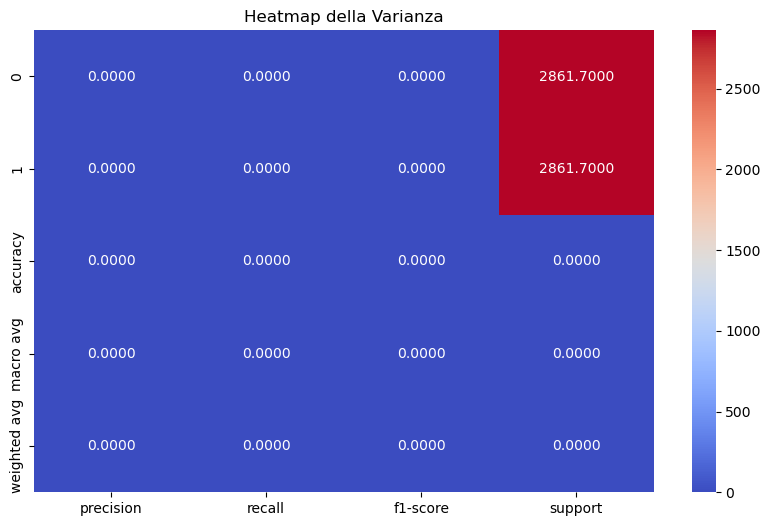

In [6]:
mean_df = pd.concat(report_df_list).groupby(level=0).mean()
variance_df = pd.concat(report_df_list).groupby(level=0).var()

# Crea una nuova figura per la media
plt.figure(figsize=(10, 6))
sns.heatmap(mean_df, annot=True, cmap='coolwarm', fmt = '.4f')
plt.title('Heatmap della Media')
plt.show()

# Crea una nuova figura per la varianza
plt.figure(figsize=(10, 6))
sns.heatmap(variance_df, annot=True, cmap='coolwarm', fmt = '.4f')
plt.title('Heatmap della Varianza')
plt.show()

no ROC

---

**Training del miglior modello individuato su tutto il dataset e testing**

In [7]:
input, output = get_SVM_dataset('data/training/input.csv', 'data/training/output.csv')
input_test, output_test = get_SVM_dataset('data/testing/input.csv', 'data/testing/output.csv')

Epoch 1/10
3995/3995 [==============================] - 14s 3ms/step - loss: 0.0971 - accuracy: 0.9762 - val_loss: 0.0482 - val_accuracy: 0.9905
Epoch 2/10
3995/3995 [==============================] - 13s 3ms/step - loss: 0.0406 - accuracy: 0.9915 - val_loss: 0.0431 - val_accuracy: 0.9906
Epoch 3/10
3995/3995 [==============================] - 13s 3ms/step - loss: 0.0383 - accuracy: 0.9915 - val_loss: 0.0406 - val_accuracy: 0.9904
Epoch 4/10
3995/3995 [==============================] - 13s 3ms/step - loss: 0.0364 - accuracy: 0.9916 - val_loss: 0.0383 - val_accuracy: 0.9907
Epoch 5/10
3995/3995 [==============================] - 12s 3ms/step - loss: 0.0350 - accuracy: 0.9916 - val_loss: 0.0375 - val_accuracy: 0.9907
Epoch 6/10
3995/3995 [==============================] - 12s 3ms/step - loss: 0.0345 - accuracy: 0.9916 - val_loss: 0.0372 - val_accuracy: 0.9907
Epoch 7/10
3995/3995 [==============================] - 12s 3ms/step - loss: 0.0343 - accuracy: 0.9916 - val_loss: 0.0372 - val_ac

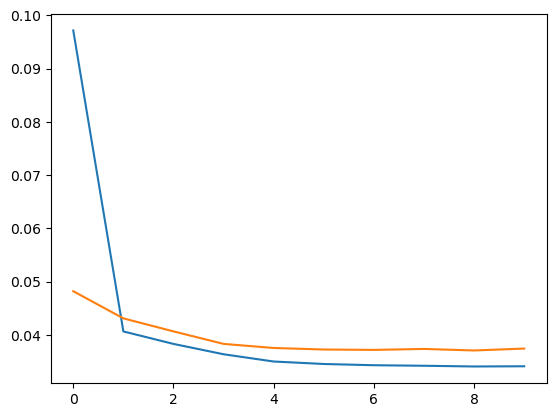

In [8]:
model = Sequential()
model.add(Dense(8, input_dim=input.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input, output, epochs=10, batch_size=32, verbose=1, validation_data=(input_test, output_test))

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.show()

In [9]:
compute_classification_report(model, input_test, output_test)

999/999 [==============================] - 2s 2ms/step


,precision,recall,f1-score,support
0,0.996033,0.991247,0.993634,23305.000000
1,0.976734,0.989372,0.983012,8656.000000
accuracy,0.990739,0.990739,0.990739,0.990739
macro avg,0.986383,0.990309,0.988323,31961.000000
weighted avg,0.990806,0.990739,0.990757,31961.000000


In [10]:
confusion_matrix(output_test, model.predict(input_test) > 0.5)

999/999 [==============================] - 2s 2ms/step


array([[23101,   204],
       [   92,  8564]], dtype=int64)